In [6]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
import re
data = pd.read_csv('morgan4.csv')
advisor = []
ad_tweet = []
data = data[~data['text'].isna()]
ad = data[data["screen_name"].str[-2:]==("MS" or "ms")]
advisor = np.unique(ad["screen_name"])
ad_tweet,counts = np.unique(ad["text"].str[:40],return_counts= True)

ad_v2 = [x.screen_name for x in data.itertuples() if x.text[:40] in ad_tweet]
advisor_v2,c = np.unique(ad_v2,return_counts= True)
advisor_v2 = advisor_v2.tolist()

data_ms_cleaned= data[~data['screen_name'].isin(advisor_v2)]
data_ms_cleaned


,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,DavidGPhelps,David George Phelps,2176871360,947972825016651777,/DavidGPhelps/status/947972825016651777,2018-01-01 23:28:28,1514849308,"Oh well, what the hell: I get to formulate som...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,0,0,0,False,True,9.434360e+17,"[{'screen_name': 'Robert_Marsden_', 'user_id':..."
4,AGORACOM,AGORACOM - George,14877483,947958366793592833,/AGORACOM/status/947958366793592833,2018-01-01 22:31:01,1514845861,The latest TSX Venture Tweets - Via AGORACOM! ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://paper.li/AGORACOM/tsx-venture-tweets...,...,NaN,[],NaN,2,0,0,False,False,NaN,[]
5,sachzaus,sachz,362789397,947958176963493890,/sachzaus/status/947958176963493890,2018-01-01 22:30:16,1514845816,$BGS.ASX @BirimianLtd #LITHIUM #TRUMP #POTUS K...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,['https://pbs.twimg.com/media/DSfS7-bVAAAFosv....,NaN,10,2,0,False,False,NaN,[]
7,alexfe15,Alex Fedosseev,169775941,947943113472929792,/alexfe15/status/947943113472929792,2018-01-01 21:30:24,1514842224,I think #MorganStanley itself is worth less th...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,2,0,0,False,True,9.479054e+17,"[{'screen_name': 'dianefrancis1', 'user_id': '..."
10,ramonagusta,"Ramon Agusta, Esq.",106469050,947939794474225665,/ramonagusta/status/947939794474225665,2018-01-01 21:17:13,1514841433,Try this #March192019weareoutA50triggered,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,0,0,0,False,True,9.434360e+17,"[{'screen_name': 'Robert_Marsden_', 'user_id':..."
11,CMCContent,Carlos Castillo,763412926392733696,947939601217306625,/CMCContent/status/947939601217306625,2018-01-01 21:16:27,1514841387,Would love for human advisors to make a case a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,0,0,0,False,True,9.478908e+17,"[{'screen_name': 'elerianm', 'user_id': '33261..."
17,ramonagusta,"Ramon Agusta, Esq.",106469050,947922827981787137,/ramonagusta/status/947922827981787137,2018-01-01 20:09:48,1514837388,You must be a bot. Too many hashtags.,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,0,0,1,True,True,9.434360e+17,"[{'screen_name': 'Robert_Marsden_', 'user_id':..."
18,FionaMullenCY,FionaMullen,749593849,947920262460256257,/FionaMullenCY/status/947920262460256257,2018-01-01 19:59:36,1514836776,Of course it hasn’t,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,1,0,0,False,True,9.478356e+17,"[{'screen_name': 'georgiemark', 'user_id': '31..."
19,TonyFlury,Tony Flury #FBPE,217741145,947917840266428416,/TonyFlury/status/947917840266428416,2018-01-01 19:49:59,1514836199,Even when that referendum was explicitly advis...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,0,0,0,False,True,9.434360e+17,"[{'screen_name': 'ramonagusta', 'user_id': '10..."
20,DavidGPhelps,David George Phelps,2176871360,947972825016651777,/DavidGPhelps/status/947972825016651777,2018-01-01 23:28:28,1514849308,"Oh well, what the hell: I get to formulate som...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,[],NaN,0,0,0,False,True,9.434360e+17,"[{'screen_name': 'Robert_Marsden_', 'user_id':..."


In [16]:
data_ms_cleaned['timestamp'].dtypes
pd.to_datetime(data_ms_cleaned['timestamp'])
data_ms_cleaned['timestamp'].dtypes
data_ms_cleaned.iloc[1]['timestamp']

Timestamp('2018-01-01 22:31:01')

In [25]:
#pd.DatetimeIndex(data_ms_cleaned['timestamp']).year
data_ms_cleaned.loc[:,'year_month'] = data_ms_cleaned.loc[:,'timestamp'].dt.strftime('%Y-%m')
data_ms_cleaned.head(3)


,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,year,year_month
0,DavidGPhelps,David George Phelps,2176871360,947972825016651777,/DavidGPhelps/status/947972825016651777,2018-01-01 23:28:28,1514849308,"Oh well, what the hell: I get to formulate som...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,0,0,0,False,True,9.434360e+17,"[{'screen_name': 'Robert_Marsden_', 'user_id':...",2018,2018-01
4,AGORACOM,AGORACOM - George,14877483,947958366793592833,/AGORACOM/status/947958366793592833,2018-01-01 22:31:01,1514845861,The latest TSX Venture Tweets - Via AGORACOM! ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://paper.li/AGORACOM/tsx-venture-tweets...,...,NaN,2,0,0,False,False,NaN,[],2018,2018-01
5,sachzaus,sachz,362789397,947958176963493890,/sachzaus/status/947958176963493890,2018-01-01 22:30:16,1514845816,$BGS.ASX @BirimianLtd #LITHIUM #TRUMP #POTUS K...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,NaN,10,2,0,False,False,NaN,[],2018,2018-01


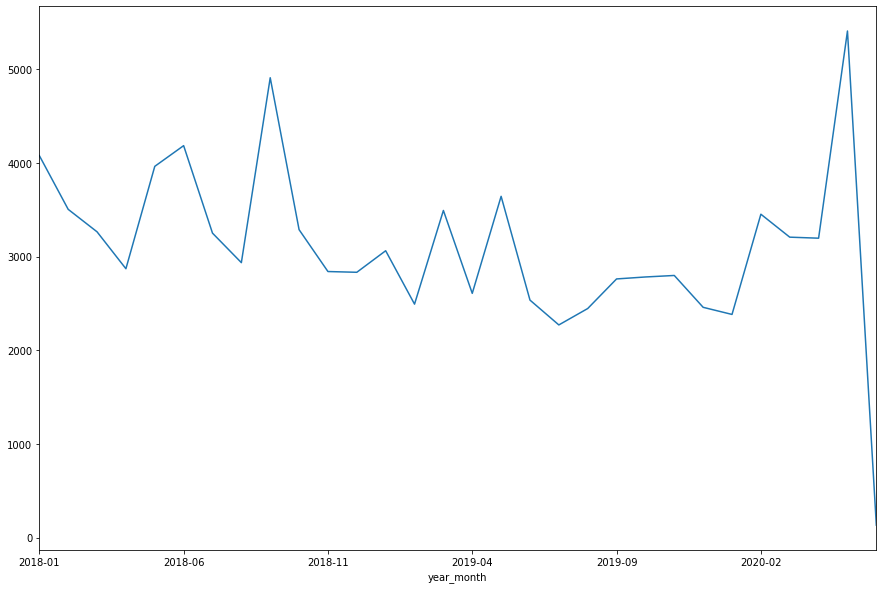

In [34]:
import plotly as plt
# data_ms_cleaned.loc[:,''].plot(kind='line',figsize=(15,10))
# plt.title("Fuel Mix over Time")
# plt.xlabel("Months")
# plt.ylabel("Daily Average")

data_ms_cleaned.groupby(['year_month']).count()['tweet_url'].plot(kind='line',figsize=(15,10))

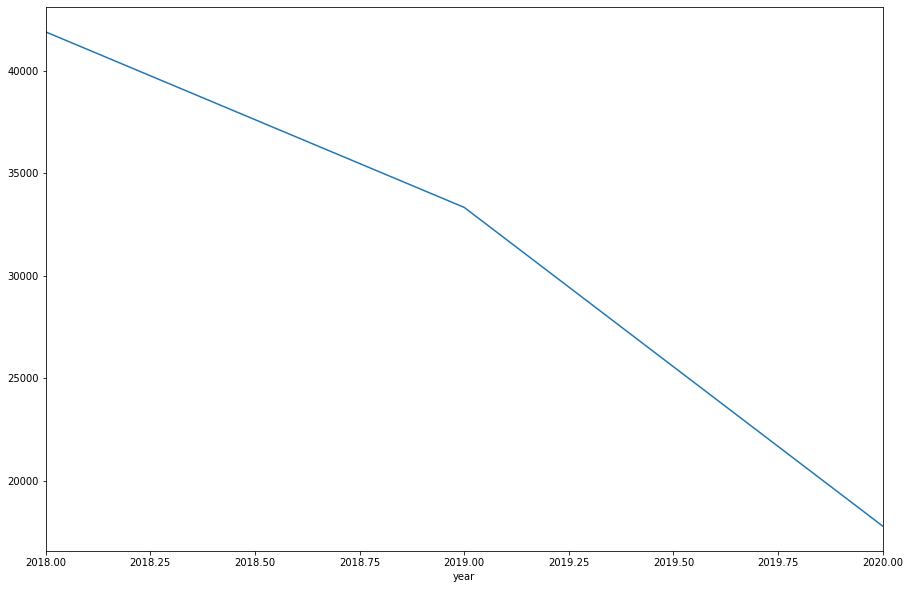

In [37]:
data_ms_cleaned.groupby(['year']).count()['tweet_url'].plot(kind='line',figsize=(15,10))